# Imports

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
import math

from sklearn.model_selection import train_test_split

# Helper Functions

# Part I - Preprocessing

In [102]:
#create dataframe 
df = pd.read_csv('master.csv')

#rename columns of data frame
df = df.rename(columns={'Unnamed: 0' :'Size','Unnamed: 1':'Ticks', 'Unnamed: 2': 'Seconds', 'Unnamed: 3' : 'Memory', 'Unnamed: 4' :'Percent_Sort', 'Unnamed: 5' : 'Algorithm'})

#drop na values from data frame
df = df.dropna()

print(df.shape)
df.head(5)

(38201, 6)


,Size,Ticks,Seconds,Memory,Percent_Sort,Algorithm
0,21.0,4.0,0.000004,84.0,1.0,4.0
2,137.0,2.0,0.000002,548.0,95.0,4.0
4,949.0,7.0,0.000007,3796.0,95.0,4.0
6,529.0,5.0,0.000005,2116.0,95.0,4.0
8,740.0,5.0,0.000005,2960.0,95.0,4.0


In [103]:
#verify no na values
df.isna().sum()

Size            0
Ticks           0
Seconds         0
Memory          0
Percent_Sort    0
Algorithm       0
dtype: int64

In [104]:
#check data types of the columns
df.dtypes

Size            float64
Ticks           float64
Seconds         float64
Memory          float64
Percent_Sort    float64
Algorithm       float64
dtype: object

In [105]:
df.head(5)

,Size,Ticks,Seconds,Memory,Percent_Sort,Algorithm
0,21.0,4.0,0.000004,84.0,1.0,4.0
2,137.0,2.0,0.000002,548.0,95.0,4.0
4,949.0,7.0,0.000007,3796.0,95.0,4.0
6,529.0,5.0,0.000005,2116.0,95.0,4.0
8,740.0,5.0,0.000005,2960.0,95.0,4.0


In [139]:
# Separate features from the target
#X = intc.drop(columns = ['Close'])

X = df[['Size','Memory','Percent_Sort']].copy()
y = df['Seconds'].copy()

In [140]:
print(X.shape)
print(y.shape)

(38201, 3)
(38201,)


In [141]:
X.isna().sum()

Size            0
Memory          0
Percent_Sort    0
dtype: int64

In [142]:
y.isna().sum()

0

In [143]:
# Partition the data into train and test with a split ratio of 75/25 for train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

# Part-II Linear Regression

In [144]:
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [145]:
theta_best.shape

(3,)

In [146]:
# Make predictions on X_test using theta_best
y_pred_ls = X_test.dot(theta_best)
y_pred_ls

63508    0.005492
2692     0.000581
7230     0.000501
56388    0.001281
10020    0.000055
           ...   
5202     0.000495
46750    0.003752
40996    0.004888
71380    0.005849
64662    0.001735
Length: 9551, dtype: float64

In [147]:
#compute the mse, rmse, and mae for the Least Squares regression model
#both numbers should be < 1
sklearn_mae_ls = mean_absolute_error(y_test, y_pred_ls)
sklearn_mse_ls = mean_squared_error(y_test, y_pred_ls)
sklearn_rmse_ls = math.sqrt(mean_squared_error(y_test, y_pred_ls))
sklearn_r2_ls = r2_score(y_test, y_pred_ls, multioutput='variance_weighted')

In [148]:
print(sklearn_mae_ls, sklearn_mse_ls,sklearn_rmse_ls,sklearn_r2_ls, sep='\n')

4.6448528846854336e-05
1.4076129128231571e-08
0.00011864286378974326
0.9959175729937545


Text(0, 0.5, 'Sort time')

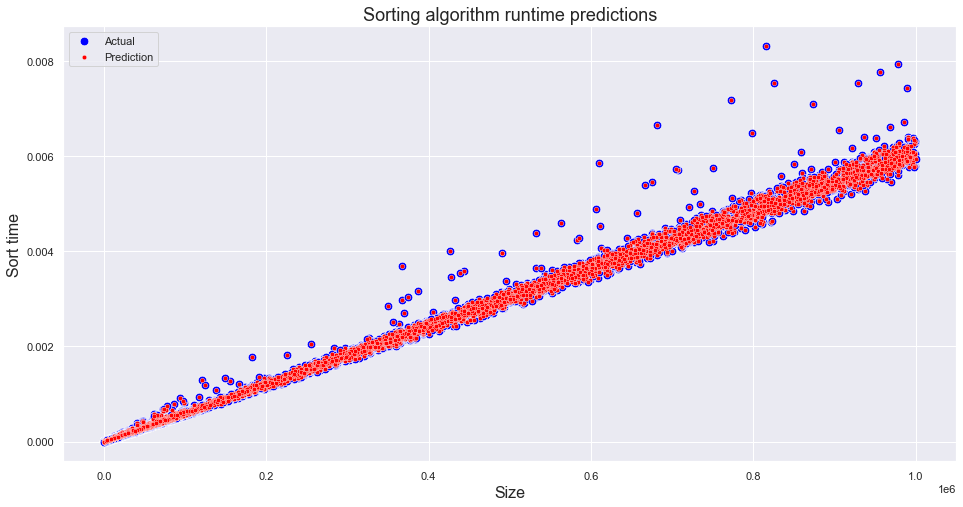

In [138]:
import seaborn as sns
sns.set()
plt.figure(figsize=(16,8))

#ax = plt.axes()
#ax.set_facecolor("#eaeaf2")
#[ax.spines[side].set_visible(False) for side in ax.spines]

actual_scatter_plt = sns.scatterplot(x=X['Size'], y=y_test, color="blue", label ='Actual',s=75)
prediction_scatter_plt = sns.scatterplot(x=X['Size'], y=y_pred_ls, color="red", label ='Prediction', s=20)

plt.title("Sorting algorithm runtime predictions", fontsize=18)

plt.xlabel("Size",fontsize=16)
plt.ylabel("Sort time",fontsize=16)